In [3]:
# Imports
!pip install statsmodels==0.13.5
import csv
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

!pip install scikit-learn==1.2.2
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, auc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.1 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1,

In [4]:
# Choosing the file for the model
from google.colab import files
uploaded = files.upload()

Saving ML_processed_job_postings_finale.csv to ML_processed_job_postings_finale.csv


In [5]:
finaldata = pd.read_csv('ML_processed_job_postings_finale.csv')
finaldata.head()

,job_id,title,work_type,description,min_salary,max_salary,normalized_salary,views,original_listed_time,expiry,...,company_size,country,headquarter state,headquarter city,headquarter addr,headquarter zipcode,industry,speciality,employee_count,follower_count
0,95428182,Administrative Coordinator,FULL_TIME,Job Title: Administrative CoordinatorOrganizat...,NaN,NaN,52000.0,1.0,4/11/2024 17:14,5/11/2024 17:14,...,NaN,US,Ohio,Cleveland,3635 PERKINS AVE,44114,Non-profit Organizations,NaN,6,289
1,266566927,Marketing & Office Coordinator,FULL_TIME,About Revesco Properties:Revesco Properties is...,55000.0,75000.0,65000.0,13.0,4/18/2024 16:49,5/18/2024 16:49,...,1.0,US,CO,Denver,2731 17th Street,80211,Real Estate,NaN,16,1880
2,266825034,Software Support Specialist,FULL_TIME,Are you driven by the thrill of solving proble...,60000.0,65000.0,62500.0,NaN,4/11/2024 18:22,10/8/2024 18:21,...,NaN,US,NY,New York City,0,0,Staffing and Recruiting,Recruitment,1,2
3,1014822088,Marketing Specialist,FULL_TIME,About TrackerTracker is a leading global cloud...,70000.0,80000.0,75000.0,7.0,4/18/2024 19:37,5/18/2024 19:37,...,2.0,US,California,San Diego,3830 Valley Centre Dr,92130,Software Development,"CRM (Customer Relationship Management), Softwa...",75,5046
4,1093227543,Sales Associate Natural Food Products,FULL_TIME,OVERVIEW:Poshi LLC (Poshi) is a healthy food c...,60000.0,120000.0,90000.0,71.0,4/17/2024 21:27,10/14/2024 21:27,...,NaN,US,FL,Miami,175 SW 7th Street,33130,Food and Beverage Services,NaN,15,751


In [6]:
columndrops = [0,1,2,3,4,5,7,8,9,10,11,12,14,15,16,17,27,28,29,30,31,32,33,34,35,36,37,38,39]
finaldata = finaldata.drop(finaldata.columns[columndrops], axis=1)
finaldata.head()

,normalized_salary,is_data_related,programming_languages_score,analysis_statistics_score,machine_learning_score,data_visualization_score,cloud_platform_score,database_score,big_data_tools_score,big_data_score,business_engineering_score
0,52000.0,True,1,1,0,0,2,0,0,0,0
1,65000.0,True,1,1,0,0,1,0,0,0,0
2,62500.0,True,3,1,0,0,0,0,0,0,0
3,75000.0,True,1,0,0,0,1,0,0,0,0
4,90000.0,True,1,2,0,0,0,0,0,0,0


In [7]:
processed_data = finaldata.copy()
processed_data.head()

,normalized_salary,is_data_related,programming_languages_score,analysis_statistics_score,machine_learning_score,data_visualization_score,cloud_platform_score,database_score,big_data_tools_score,big_data_score,business_engineering_score
0,52000.0,True,1,1,0,0,2,0,0,0,0
1,65000.0,True,1,1,0,0,1,0,0,0,0
2,62500.0,True,3,1,0,0,0,0,0,0,0
3,75000.0,True,1,0,0,0,1,0,0,0,0
4,90000.0,True,1,2,0,0,0,0,0,0,0


In [8]:
processed_data['salary_over_100k'] = (processed_data['normalized_salary'] > 100).astype(int)

In [9]:
X = processed_data.drop(['normalized_salary', 'salary_over_100k'], axis=1)  # Features (exclude the original salary and the new binary target)
y = processed_data['salary_over_100k']  # Target variable (the binary classification target)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

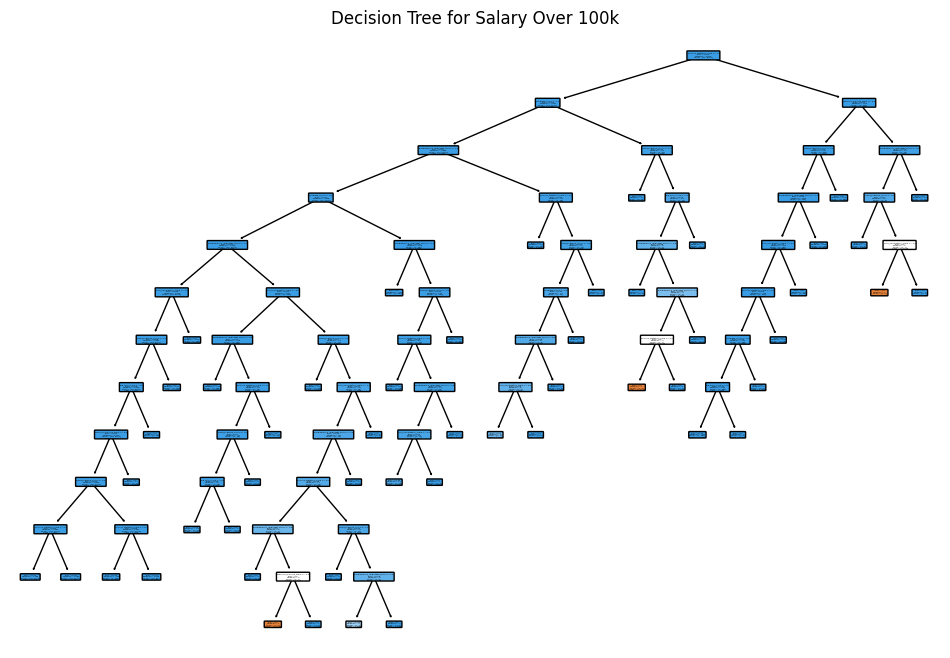

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=X.columns, filled=True, rounded=True, class_names=['<=100k', '>100k'])
plt.title("Decision Tree for Salary Over 100k")
plt.show()

In [12]:
y_pred = tree_classifier.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred, target_names=['<=100k', '>100k']))

              precision    recall  f1-score   support

      <=100k       0.00      0.00      0.00        36
       >100k       0.99      1.00      0.99      3552

    accuracy                           0.99      3588
   macro avg       0.49      0.50      0.50      3588
weighted avg       0.98      0.99      0.98      3588



In [14]:
print(confusion_matrix(y_test, y_pred))

[[   0   36]
 [   3 3549]]


In [15]:
y_probs = tree_classifier.predict_proba(X_test)

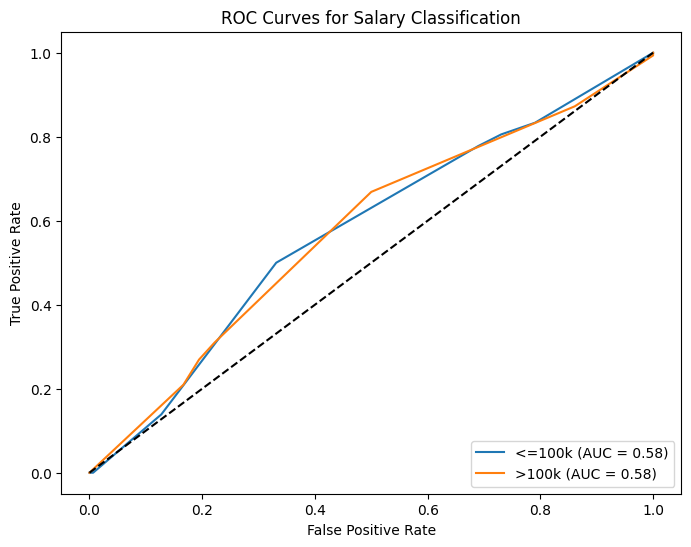

In [18]:
# Calculate ROC curve and AUC for each class
fpr_class0, tpr_class0, _ = roc_curve(y_test, y_probs[:, 0], pos_label=0)  # Class 0 (<=100k)
fpr_class1, tpr_class1, _ = roc_curve(y_test, y_probs[:, 1], pos_label=1)  # Class 1 (>100k)

roc_auc_class0 = auc(fpr_class0, tpr_class0)
roc_auc_class1 = auc(fpr_class1, tpr_class1)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_class0, tpr_class0, label=f'<=100k (AUC = {roc_auc_class0:.2f})')
plt.plot(fpr_class1, tpr_class1, label=f'>100k (AUC = {roc_auc_class1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Salary Classification')
plt.legend(loc='lower right')
plt.show()

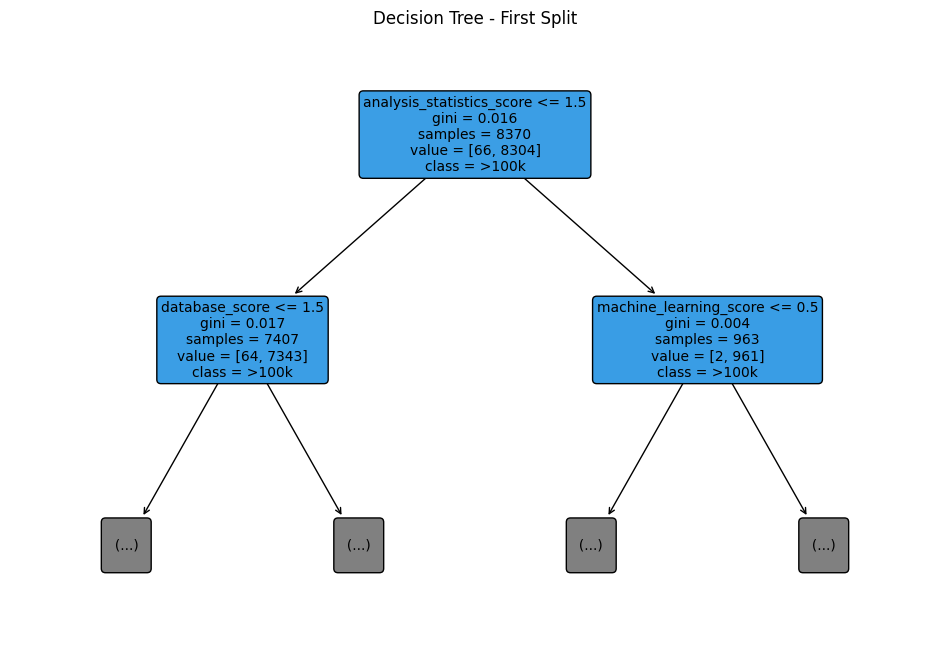

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, feature_names=X.columns, filled=True, rounded=True, class_names=['<=100k', '>100k'], max_depth=1)  # Added max_depth=1
plt.title("Decision Tree - First Split")
plt.show()